# K Nearest Neighbors - Classification

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique. 

A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

<img src='../../../img/KNN_similarity.png'>

It should also be noted that all three distance measures are only valid for continuous variables. In the instance of categorical variables the **Hamming distance** must be used. It also brings up the issue of standardization of the numerical variables between 0 and 1 when there is a mixture of numerical and categorical variables in the dataset.

<img src='../../../img/KNN_hamming.png'>

For example, Consider the following data concerning credit default. Age and Loan are two numerical variables (predictors) and Default is the target.

<img src='../../../img/KNN_example_1.png' height="600" width="800">

We can now use the training set to classify an unknown case (Age=48 and Loan=$142,000) using Euclidean distance. If K=1 then the nearest neighbor is the last case in the training set with Default=Y.

$ D = Sqrt[(48-33)^2 + (142000-150000)^2] = 8000.01  >> Default=Y $

<img src='../../../img/KNN_example_2.png' height="600" width="800">

### Code Dictionary
code | description
-----|------------
`KNeighborsClassifier()` | K Nearest Neighbor Classification.
`.meshgrid` |  Generate a matrix of the the specified ranges.
`confusion_matrix` |  Describe the confusion matrix displaying the ratio of the actual and prediction models output.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [3]:
y_pred = classifier.predict(X_test)

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
confusion_matrix(y_test, y_pred)

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [7]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


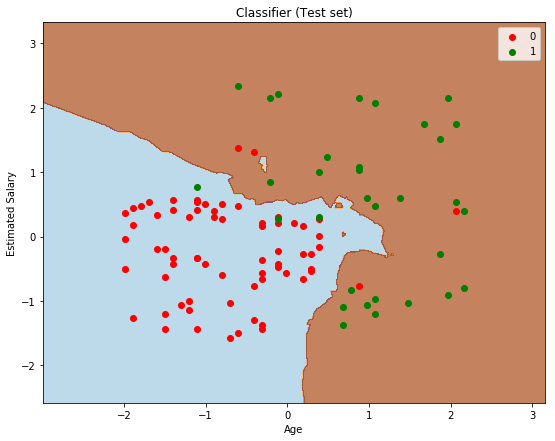

In [9]:
plt.figure(figsize=(9,7))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = plt.cm.Paired)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()